# Boombikes Bike Sharing Assignment

## **Problem Statement**

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

Which variables are significant in predicting the demand for shared bikes.
How well those variables describe the bike demands
Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 


Business Goal:
You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

## Importing libraries and packages

In [4]:
import warnings
warnings.filterwarnings(action='ignore')

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score, mean_squared_error

## Data Understanding

In [7]:
# dataset
bike_data = pd.read_csv('day.csv');

In [8]:
bike_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [9]:
pd.set_option('display.max_columns', None)

In [10]:
# Inspecting the data shape
bike_data.shape

(730, 16)

In [11]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


From the data info we can infer that
- Some columns are categorical in nature (like mnth, season, weekday and weathersit), however, their datatype is int64 which needs to be handled later during the data cleaning process.

### Data Quality Checks

In [14]:
# Checking for null values in the dataset in
round(100 * (bike_data.isnull().sum() / len(bike_data)), 2).sort_values(ascending = False)

instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

##### There are no null values in the dataset.

In [16]:
# Dropping duplicates
bike_data.drop_duplicates(inplace = True)
bike_data.shape

(730, 16)

##### There are no duplicates in the dataset.

## Data Analysis and Cleaning

In [19]:
# Checking out the columns present in the dataframe
bike_data.columns.sort_values()

Index(['atemp', 'casual', 'cnt', 'dteday', 'holiday', 'hum', 'instant', 'mnth',
       'registered', 'season', 'temp', 'weathersit', 'weekday', 'windspeed',
       'workingday', 'yr'],
      dtype='object')

### Dropping columns

Based on the information provided in the data dictionary:

- Eliminated `casual` and `registered` as our focus is on total bike count.

- Dropped `instant` as it has a unique value which is not useful in data analysis.

- Column `dteday` can be removed since similar information is decoded into `yr`, `mnth` and `weekday`.

In [21]:
bike_data.drop(['casual', 'dteday', 'instant', 'registered'], axis = 1, inplace = True)
bike_data.shape

(730, 12)

In [22]:
# Columns after processing Data
bike_data.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

### Data Conversion
To make `season` a categorical variable we will be mapping this as mentioned in the data dictionary.
- season : season (1:spring, 2:summer, 3:fall, 4:winter)

In [24]:
# Replacing the number values
bike_data['season'].replace({ 1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter' }, inplace = True)

In [25]:
bike_data['season'].value_counts()

season
Fall      188
Summer    184
Spring    180
Winter    178
Name: count, dtype: int64

***Replacing month values***

In [27]:
bike_data.mnth.replace({1: 'Jan',2: 'Feb',3: 'Mar',4: 'Apr',5: 'May',6: 'Jun', 7: 'Jul',
                    8: 'Aug',9: 'Sep',10: 'Oct',11: 'Nov',12: 'Dec'}, inplace = True)

In [28]:
bike_data['mnth'].value_counts()

mnth
Jan    62
Mar    62
May    62
Jul    62
Aug    62
Oct    62
Dec    62
Apr    60
Jun    60
Sep    60
Nov    60
Feb    56
Name: count, dtype: int64

***Replacing weekday values***

In [30]:
bike_data.weekday.replace({0: 'Sun',1: 'Mon',2: 'Tue',3: 'Wed',4: 'Thu',5: 'Fri',6: 'Sat'}, inplace = True)

In [31]:
bike_data['weekday'].value_counts()

weekday
Sat    105
Sun    105
Mon    105
Tue    104
Thu    104
Fri    104
Wed    103
Name: count, dtype: int64

***Replacing weathersit values***

In [33]:
bike_data.weathersit.replace({1:'Clear',2:'Misty',3:'Light_snow',4:'Heavy_snow'}, inplace = True)

In [34]:
bike_data['weathersit'].value_counts()

weathersit
Clear         463
Misty         246
Light_snow     21
Name: count, dtype: int64

### Univariate Analysis

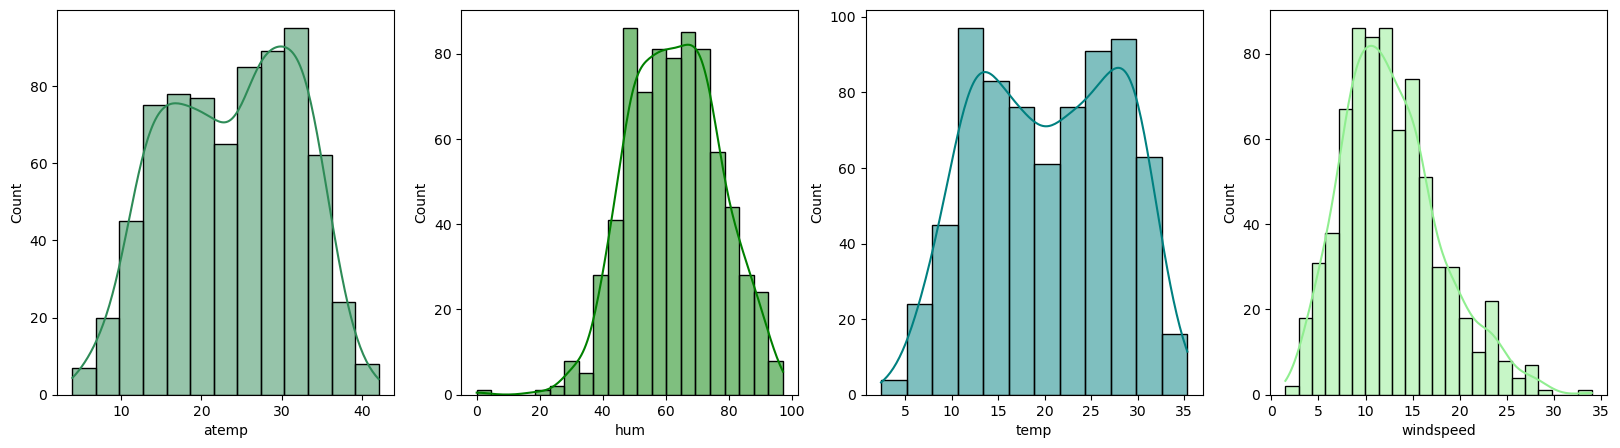

In [36]:
# Analysis the numerical variables

numerical_variables = {
    'atemp': { 'color': 'seagreen' },
    'hum': { 'color': 'green' },
    'temp': { 'color': 'teal' },
    'windspeed': { 'color': 'lightgreen' }
}

fig, ax = plt.subplots(nrows = 1, ncols = 4, figsize = (20, 5))

for i, (cont, config) in enumerate(numerical_variables.items()):
    sns.histplot(data = bike_data, x = cont, ax = ax[i], color = config['color'], kde = True)

plt.show()

***From the given graphs we can analyse that***
- Bikes were rented at an average temperature (`temp`) of ~20°C.
- The average feeling temperature (`atemp`) during bike rentals is approximately ~22°C.
- Humidity (`hum`) averaged around ~60 during bike rentals.
- The average windspeed (`windspeed`) during bike rentals is approximately 12.

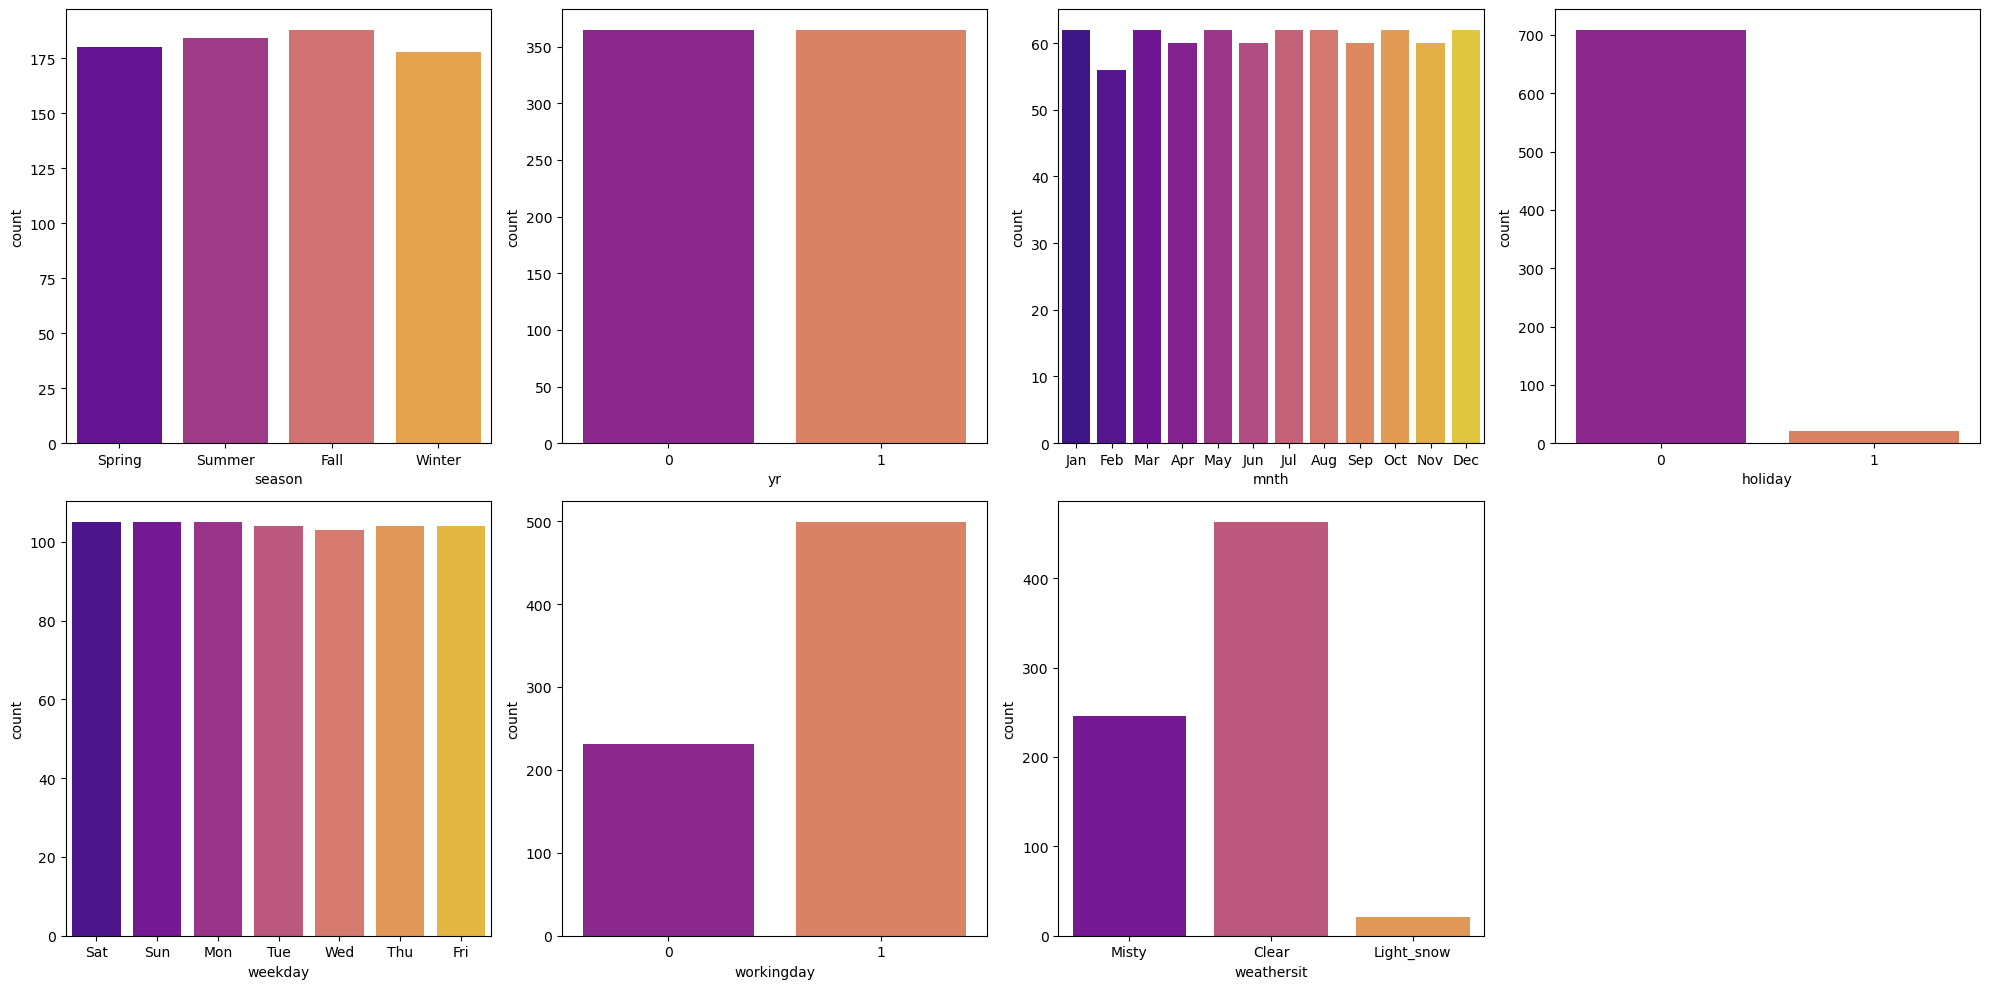

In [38]:
# Analysis the categorical variables

categorical_variables = [
    'season',
    'yr',
    'mnth',
    'holiday',
    'weekday',
    'workingday',
    'weathersit'
]
fig, ax = plt.subplots(nrows = 2, ncols = 4, figsize = (20, 10))
for i, cat in enumerate(categorical_variables):
    sns.countplot(data = bike_data, x = cat, palette = 'plasma', ax = ax[i // 4, i % 4])
    ax[i // 4, i % 4].set_xticklabels(ax[i // 4, i % 4].get_xticklabels())

# Hide the last column
ax[1, 3].axis('off')

plt.tight_layout()
plt.show()

Based on these, we can see that the 3 important variables are `workingday`, `weathersit` and `holiday`
Observations from these:
- Most of the bikes are rented on working days.  
- Most of the rentals are preferred on a clear day.  
- Least number of bikes are rented on public holidays.

### Bivariate Analysis

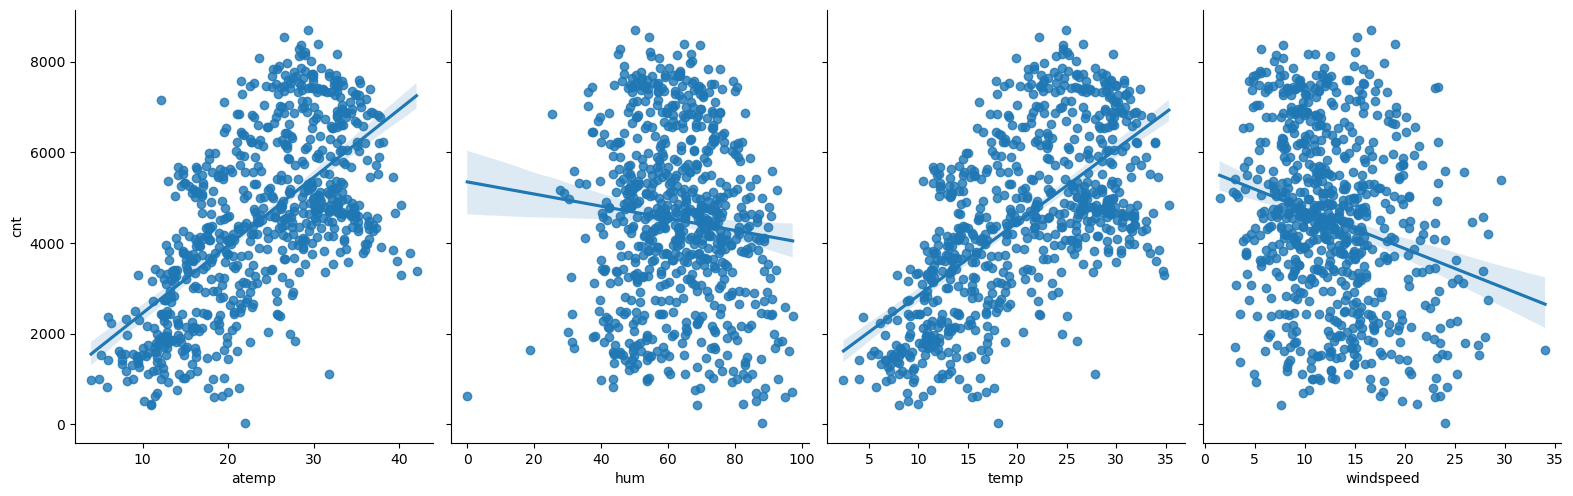

In [41]:
# Numerical variables with a target variable cnt
sns.pairplot(bike_data, x_vars= numerical_variables,
             y_vars= ['cnt'], kind='reg', diag_kind='auto', height=5, aspect=0.8)
plt.show()

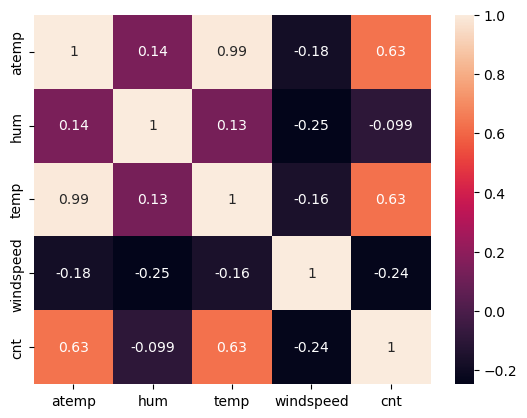

In [42]:
# Finding correlation between these variables
bike_data[list(numerical_variables.keys()) + ['cnt']].corr(numeric_only = True)
corr_df = bike_data[list(numerical_variables.keys()) + ['cnt']].corr(numeric_only = True)
sns.heatmap(data = corr_df, annot = True)
plt.show()

### Inference
- `atemp` and `temp` have a strong correlation with `cnt`.
- `windspeed` has a negative correlation with bike rentals.
- `hum` has a negative correlation with bike rentals.
- `atemp` and `temp` show a strong correlation, which means they show multicolinearity.

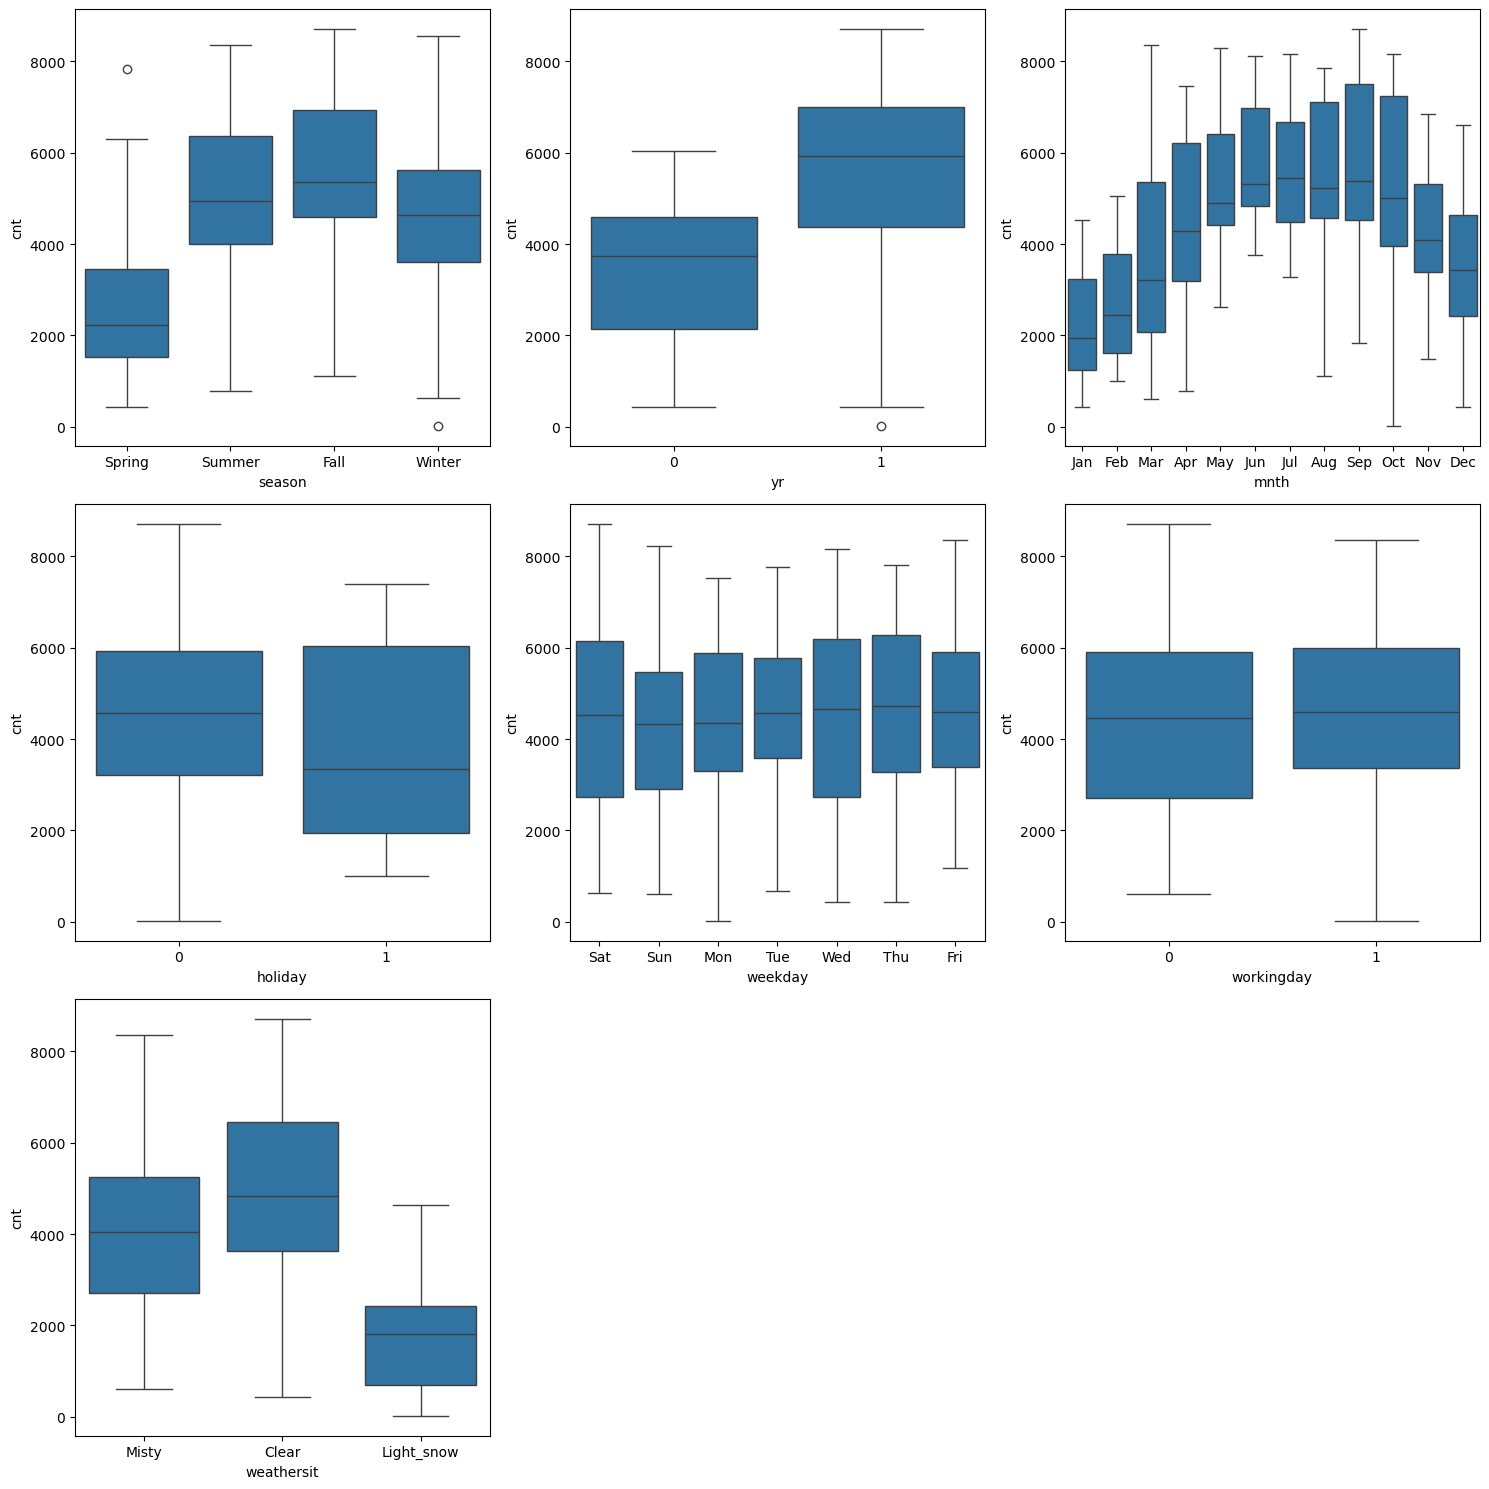

In [44]:
# Categorical variables against a target variable `cnt`
plt.figure(figsize = (15, 15))
for i, cat in enumerate(categorical_variables):
    plt.subplot(3, 3, i+1)
    sns.boxplot(data = bike_data, x = cat, y = 'cnt')

plt.tight_layout()    
plt.show()

### Inference
- Fall season had highest bike rentals.
- 2019 had more bike rentals than 2018.
- Peak bike rentals occurred during September.
- The highest bike rentals were observed during clear weather conditions.

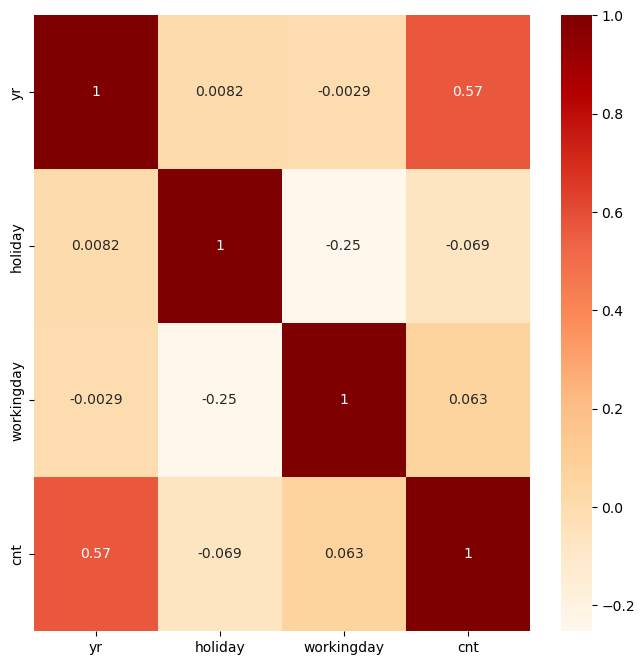

In [46]:
# Verifying the correlation
plt.figure(figsize = (8, 8))
corr_df = bike_data[list(categorical_variables) + ['cnt']].corr(numeric_only = True)
sns.heatmap(data = corr_df, annot = True, cmap = 'OrRd')
plt.show()

### Inference
- Only `yr` is having a significant positive correlation among all categorical variables

### Data Preparation

### One Hot Encoding
- converts categorical variables into binary columns, where each unique category gets a separate column with 1 indicating presence and 0 otherwise.

In [50]:
# Identifying columns for which dummy variables need to be created
cat_cols = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']
bike_data[cat_cols].nunique()

season         4
yr             2
mnth          12
holiday        2
weekday        7
workingday     2
weathersit     3
dtype: int64

In [51]:
# Categorical variables with more than 2 unique values will have dummy variables
bike_data = pd.get_dummies(data = bike_data, columns = ['season', 'mnth', 'weekday', 'weathersit'], drop_first = True, prefix = '', prefix_sep = '')

In [52]:
bike_data.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'Spring', 'Summer', 'Winter', 'Aug', 'Dec', 'Feb', 'Jan', 'Jul',
       'Jun', 'Mar', 'May', 'Nov', 'Oct', 'Sep', 'Mon', 'Sat', 'Sun', 'Thu',
       'Tue', 'Wed', 'Light_snow', 'Misty'],
      dtype='object')

In [53]:
bike_data = bike_data.apply(lambda x: x.astype(int) if x.dtype == 'bool' else x)

In [54]:
bike_data.shape

(730, 30)

## Model building and evaluation

In [56]:
# Dataframe with only independent variable
X = bike_data.drop('cnt', axis = 1)
# Dataframe with only dependent variable
y = bike_data['cnt']

#### Dataset split into train and test set

In [58]:
# Splitting the data with a 70-30 ratio.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100)

In [59]:
# Shape of the data
print('Shape of train independent data:', X_train.shape)
print('Shape of train dependent data:', y_train.shape)
print('Shape of test independent data:', X_test.shape)
print('Shape of test dependent data:', y_test.shape)

Shape of train independent data: (511, 29)
Shape of train dependent data: (511,)
Shape of test independent data: (219, 29)
Shape of test dependent data: (219,)


#### Feature Scaling

In [61]:
scaler = StandardScaler()

# Fit and transform training set
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns, index = X_train.index)

# Only Transform Test set
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns, index = X_test.index)

In [62]:
X_train_scaled.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,Spring,Summer,Winter,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light_snow,Misty
653,0.98254,-0.161569,0.690564,-0.121991,-0.056605,-0.514975,-0.118309,-0.566051,-0.572078,1.738857,-0.325669,-0.303118,-0.266981,-0.310752,-0.287449,-0.287449,-0.329332,-0.303118,-0.30695,3.257858,-0.295354,-0.421212,-0.427633,-0.408248,-0.391789,2.552392,-0.434019,-0.173902,-0.724826
576,0.98254,-0.161569,0.690564,1.232298,1.194457,0.517177,-0.331370,-0.566051,-0.572078,-0.575091,-0.325669,-0.303118,-0.266981,-0.310752,3.478874,-0.287449,-0.329332,-0.303118,-0.30695,-0.306950,-0.295354,-0.421212,-0.427633,-0.408248,-0.391789,2.552392,-0.434019,-0.173902,-0.724826
426,0.98254,-0.161569,-1.448092,-0.421405,-0.349813,-0.069675,-0.386500,1.766626,-0.572078,-0.575091,-0.325669,-0.303118,-0.266981,-0.310752,-0.287449,-0.287449,3.036445,-0.303118,-0.30695,-0.306950,-0.295354,-0.421212,2.338451,-0.408248,-0.391789,-0.391789,-0.434019,-0.173902,1.379641
728,0.98254,-0.161569,-1.448092,-1.296629,-1.475441,-1.045794,2.019569,1.766626,-0.572078,-0.575091,-0.325669,3.299048,-0.266981,-0.310752,-0.287449,-0.287449,-0.329332,-0.303118,-0.30695,-0.306950,-0.295354,-0.421212,-0.427633,2.449490,-0.391789,-0.391789,-0.434019,-0.173902,-0.724826
482,0.98254,-0.161569,-1.448092,-0.628694,-0.572645,-1.001559,-0.781062,-0.566051,1.748015,-0.575091,-0.325669,-0.303118,-0.266981,-0.310752,-0.287449,-0.287449,-0.329332,-0.303118,-0.30695,-0.306950,-0.295354,-0.421212,2.338451,-0.408248,-0.391789,-0.391789,-0.434019,-0.173902,1.379641


#### Feature selection using RFE (Recursive Feature Elimination)
- feature selection technique that recursively removes the least important features based on a model’s performance until the optimal subset remains, improving efficiency and reducing overfitting.

In [64]:
# Create and train the model with RFE
lm = LinearRegression()

rfe = RFE(lm, n_features_to_select = 15)

rfe = rfe.fit(X_train_scaled, y_train)

In [65]:
rfe.support_

array([ True,  True, False,  True, False,  True,  True,  True,  True,
        True, False, False, False,  True,  True, False, False, False,
        True, False,  True, False, False,  True, False, False, False,
        True,  True])

In [66]:
# List of feature variables and their respective selection status and ranks
list(zip(X_train_scaled.columns, rfe.support_, rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 7),
 ('temp', True, 1),
 ('atemp', False, 5),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('Spring', True, 1),
 ('Summer', True, 1),
 ('Winter', True, 1),
 ('Aug', False, 9),
 ('Dec', False, 2),
 ('Feb', False, 3),
 ('Jan', True, 1),
 ('Jul', True, 1),
 ('Jun', False, 13),
 ('Mar', False, 14),
 ('May', False, 4),
 ('Nov', True, 1),
 ('Oct', False, 11),
 ('Sep', True, 1),
 ('Mon', False, 8),
 ('Sat', False, 6),
 ('Sun', True, 1),
 ('Thu', False, 12),
 ('Tue', False, 10),
 ('Wed', False, 15),
 ('Light_snow', True, 1),
 ('Misty', True, 1)]

In [67]:
# Get the selected features
selected_features = X_train_scaled.columns[rfe.support_]
selected_features

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'Spring', 'Summer',
       'Winter', 'Jan', 'Jul', 'Nov', 'Sep', 'Sun', 'Light_snow', 'Misty'],
      dtype='object')

In [68]:
# Functions for calculating models
def calculate_vif(X_train):
    vif = pd.DataFrame()
    vif["Features"] = X_train.columns
    vif["VIF"] = [variance_inflation_factor(X_train.values, i) for i in range(len(X_train.columns))]
    
    vif['VIF'] = round(vif['VIF'], 2)
    return vif.sort_values(by = 'VIF', ascending = False)

def generate_model_with_summary(X_train, y_train):
    X_train_sm = sm.add_constant(X_train)
    lm = sm.OLS(y_train, X_train_sm).fit()
    print(lm.summary())
    return { 'model' : lm, 'X_train_sm' : X_train_sm }

### Using VIF and models for elimination

### Model 1

In [71]:
X_train_rfe_1 = X_train_scaled[selected_features]

In [72]:
generate_model_with_summary(X_train_rfe_1, y_train)
calculate_vif(X_train_rfe_1)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     185.1
Date:                Wed, 05 Feb 2025   Prob (F-statistic):          7.37e-192
Time:                        21:22:27   Log-Likelihood:                -4114.1
No. Observations:                 511   AIC:                             8260.
Df Residuals:                     495   BIC:                             8328.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4491.3033     34.117    131.646      0.0

,Features,VIF
5,Spring,5.20
2,temp,3.97
7,Winter,3.77
6,Summer,2.68
3,hum,1.91
8,Jan,1.57
14,Misty,1.57
9,Jul,1.49
10,Nov,1.49
11,Sep,1.31


### Model 2

In [74]:
# Removing Spring as it has high VIF value and high p value
X_train_rfe_2 = X_train_rfe_1.drop(['Spring'], axis = 1)

In [75]:
generate_model_with_summary(X_train_rfe_2, y_train)
calculate_vif(X_train_rfe_2)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     195.5
Date:                Wed, 05 Feb 2025   Prob (F-statistic):          1.62e-191
Time:                        21:22:27   Log-Likelihood:                -4117.6
No. Observations:                 511   AIC:                             8265.
Df Residuals:                     496   BIC:                             8329.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4491.3033     34.321    130.861      0.0

,Features,VIF
2,temp,2.07
6,Winter,1.91
3,hum,1.90
13,Misty,1.56
7,Jan,1.55
9,Nov,1.45
8,Jul,1.43
5,Summer,1.42
12,Light_snow,1.25
10,Sep,1.20


### Model 3

In [77]:
# Removing Nov as it has high p-value
X_train_rfe_3 = X_train_rfe_2.drop(['Nov'], axis = 1)

In [78]:
generate_model_with_summary(X_train_rfe_3, y_train)
calculate_vif(X_train_rfe_3)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     210.4
Date:                Wed, 05 Feb 2025   Prob (F-statistic):          2.00e-192
Time:                        21:22:27   Log-Likelihood:                -4118.3
No. Observations:                 511   AIC:                             8265.
Df Residuals:                     497   BIC:                             8324.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4491.3033     34.329    130.832      0.0

,Features,VIF
2,temp,2.06
3,hum,1.89
12,Misty,1.56
7,Jan,1.55
6,Winter,1.53
8,Jul,1.43
5,Summer,1.42
11,Light_snow,1.25
4,windspeed,1.19
9,Sep,1.19


### Model 4

In [80]:
# Removing Jan as it has high p-value
X_train_rfe_4 = X_train_rfe_3.drop(['Jan'], axis = 1)

In [81]:
generate_model_with_summary(X_train_rfe_4, y_train)
calculate_vif(X_train_rfe_4)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     225.6
Date:                Wed, 05 Feb 2025   Prob (F-statistic):          1.60e-192
Time:                        21:22:27   Log-Likelihood:                -4120.8
No. Observations:                 511   AIC:                             8268.
Df Residuals:                     498   BIC:                             8323.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4491.3033     34.468    130.302      0.0

,Features,VIF
3,hum,1.88
2,temp,1.60
11,Misty,1.56
7,Jul,1.43
5,Summer,1.33
6,Winter,1.29
10,Light_snow,1.24
8,Sep,1.19
4,windspeed,1.18
0,yr,1.03


### Model 5

In [83]:
# Removing Jul as it has high p-value
X_train_rfe_5 = X_train_rfe_4.drop(['Jul'], axis = 1)

In [84]:
final_lr_model = generate_model_with_summary(X_train_rfe_5, y_train)
calculate_vif(X_train_rfe_5)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     242.9
Date:                Wed, 05 Feb 2025   Prob (F-statistic):          2.40e-192
Time:                        21:22:27   Log-Likelihood:                -4124.1
No. Observations:                 511   AIC:                             8272.
Df Residuals:                     499   BIC:                             8323.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4491.3033     34.655    129.601      0.0

,Features,VIF
3,hum,1.87
10,Misty,1.56
2,temp,1.27
6,Winter,1.25
9,Light_snow,1.24
5,Summer,1.19
4,windspeed,1.18
7,Sep,1.12
0,yr,1.03
1,holiday,1.02


### Residual Analysis

Residual analysis is performed to assess the goodness of fit and identify patterns or anomalies in the model's predictions.

In [86]:
# Fetch the final model and the X_train_sm from the final_lr_model
model, X_train_sm = final_lr_model.values()

In [87]:
# Calculate y_train_pred
y_train_pred = model.predict(X_train_sm)

<Figure size 800x500 with 0 Axes>

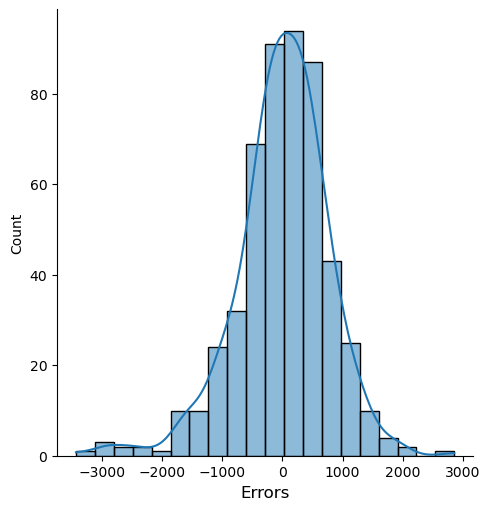

In [88]:
residuals = y_train - y_train_pred
fig = plt.figure(figsize = (8, 5))
sns.displot(residuals, bins = 20, kde = True)
plt.xlabel('Errors', fontsize = 12)
plt.show()

### Pattern on actual v/s prediction

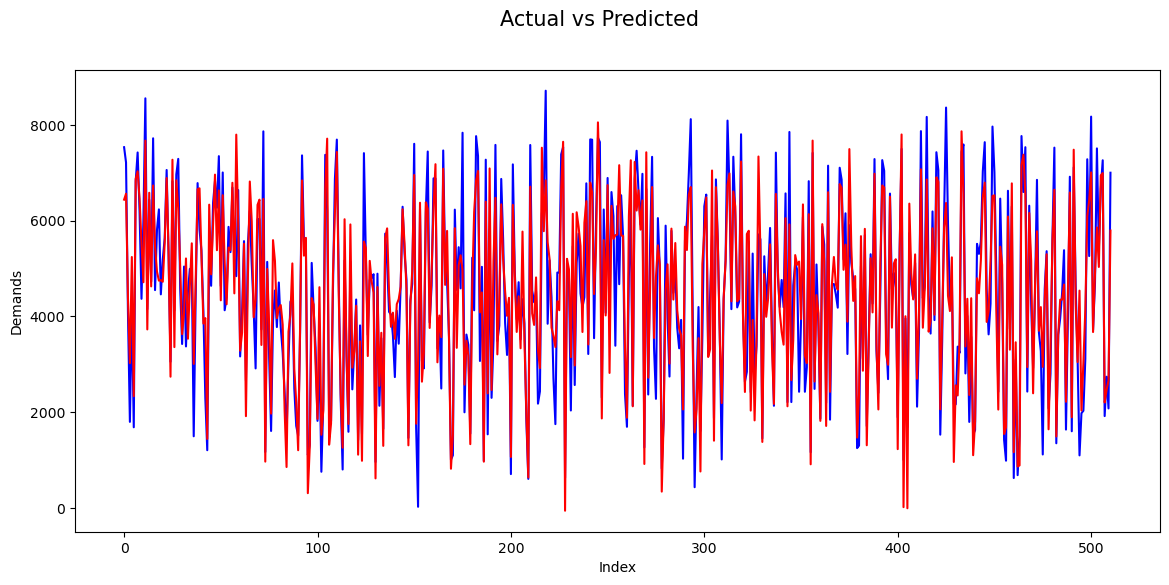

In [90]:
plt.figure(figsize=(14,6))
cnt = [i for i in range(0,len(X_train),1)]
plt.plot(cnt,y_train, color="blue")
plt.plot(cnt,y_train_pred, color="red")
plt.suptitle('Actual vs Predicted', fontsize = 15)
plt.xlabel('Index')
plt.ylabel('Demands')
plt.show()

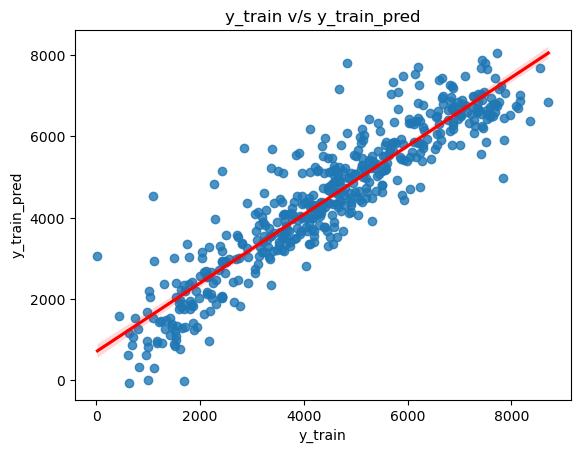

In [91]:
# Visualising with a linear regression fit line
sns.regplot(x = y_train, y = y_train_pred, line_kws = { 'color': 'red' })

# Show the plot
plt.title('y_train v/s y_train_pred')
plt.xlabel('y_train')
plt.ylabel('y_train_pred') 
plt.show()

### Final model set

In [93]:
X_test_scaled = X_test_scaled[X_train_rfe_5.columns]
X_test_scaled.head()

,yr,holiday,temp,hum,windspeed,Summer,Winter,Sep,Sun,Light_snow,Misty
184,-1.01777,6.189321,1.306004,0.048287,-1.396242,-0.572078,-0.575091,-0.295354,-0.408248,-0.173902,1.379641
535,0.98254,-0.161569,1.614633,-0.276107,-0.986093,1.748015,-0.575091,-0.295354,-0.408248,-0.173902,-0.724826
299,-1.01777,-0.161569,-0.112776,1.286864,0.078844,-0.572078,1.738857,-0.295354,-0.408248,-0.173902,1.379641
221,-1.01777,-0.161569,1.527113,-1.464546,0.110494,-0.572078,-0.575091,-0.295354,-0.408248,-0.173902,-0.724826
152,-1.01777,-0.161569,1.241512,-2.307960,1.277902,1.748015,-0.575091,-0.295354,-0.408248,-0.173902,-0.724826


In [94]:
X_test_sm = sm.add_constant(X_test_scaled)
y_test_pred = model.predict(X_test_sm)

In [95]:
# Model Params
print(model.params)

const         4491.303327
yr             997.283116
holiday       -144.317309
temp          1114.637217
hum           -210.089508
windspeed     -272.332177
Summer         338.007812
Winter         530.943515
Sep            247.104324
Sun           -142.228636
Light_snow    -357.515816
Misty         -224.310729
dtype: float64


In [96]:
# Mean squared error of the training set
mse_train = mean_squared_error(y_train, y_train_pred)
# RMSE
rmse_train = np.sqrt(mse_train)
print(rmse_train)

774.1285376430394


In [97]:
# Calculate R2 Score for the test set
r2_score_test = r2_score(y_true = y_test, y_pred = y_test_pred)
r2_score_test = round(r2_score_test, 2)
r2_score_test

0.81

In [98]:
r2_score_train = round(model.rsquared, 2)
r2_score_train

0.84

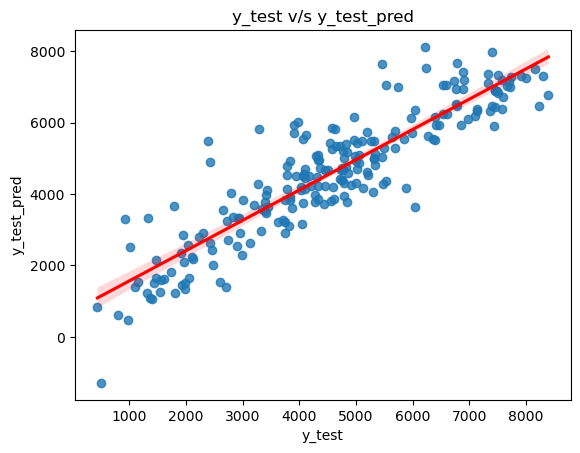

In [99]:
sns.regplot(x = y_test, y = y_test_pred, line_kws = { 'color': 'red' })

# Show the plot
plt.title('y_test v/s y_test_pred')
plt.xlabel('y_test')
plt.ylabel('y_test_pred') 
plt.show()

### Conclusion

In this project, we developed a predictive model to estimate the target variable. The model was evaluated using R-squared scores on both the training and test datasets. The training R-squared score was 0.84, while the test R² score was 0.81. These results indicate that the model is a strong fit, explaining a significant proportion of the variance in the target variable.

The slight difference between the training and test R² scores suggests that the model generalizes well to unseen data, with no significant overfitting or underfitting. This demonstrates that the model performs consistently across different datasets, providing confidence in its ability to make accurate predictions in real-world scenarios.

Overall, the model exhibits robust performance, and its ability to generalize to new data positions it as a valuable tool for the given problem. 